# Projet numérique 2 : Choix du pas de temps
 

## Question 1 : Euler explicite

In [1]:
##Schéma Euler ordre 1
import matplotlib.pyplot as plt
import numpy as np 

def solve_euler_explicit(f, x0, dt, t_max = 10):
    x=[x0]
    t=[0]
    xj = np.array(x0)
    while t[-1]< t_max: # condition de fin
        xj= xj + dt*np.array(f(xj))
        tj=t[-1]
        x.append(xj)
        t.append(tj+dt)
    return t, x

On teste sur le problème de Cauchy :
\begin{align}
\dot{y}+4y=0, x(0)=1
\end{align} dont la solution est : \begin{align} x \mapsto e^{-4x} \end{align}

In [2]:
import math

def f(x):
    return -4*x

#Solution théorique
def g(x) :
    return math.exp (-4*x)

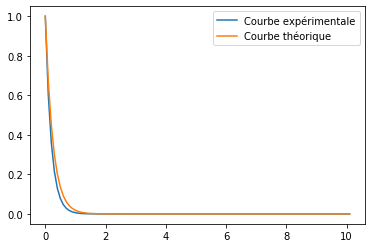

In [42]:
t, x_exp, = solve_euler_explicit(f,1, 10**-1)
x_theo = [g(i) for i in t]
plt.plot(t, x_exp, label = "Courbe expérimentale")

plt.plot(t, x_theo, label="Courbe théorique")
plt.legend()
plt.grid
plt.show()


On observe bien une erreur sur le calcul de la solution par la méthode d'Euleur, qui peut être diminuée, ici en réduisant le pas de temps. 
Nous allons ici illustrer que la convergence du schéma d'Eulet est bien d'ordre 1, en traçant l'erreur absolue maximale de notre simulation en fonction du pas de temps.
Pour cela on va déterminer pour un pas de temps dt donné, l'écart maximal(en valeur absolue) entre la solution expérimentale et la solution théorique sur l'intervalle de résolution.

In [16]:
#on commence par définir une fonction recherchant le maximum en valeur absolue dans un tableau

def max(tab) :  
    max = abs(tab[0])
    for i in range (len(tab)) :
        if tab[i]>max :
            max = tab[i]
    return max

# on crée ensuite un tableau qui répertorie les valeurs de cet écart maximal pour plusieurs dt

res = []
for n in range(6) : # on choisit 6 valeurs de dt différentes
    deltat = 10**-n
    temps, resexp = solve_euler_explicit(f,1, deltat)
    restheo = [g(i) for i in temps]
    erreur = np.array(restheo)-np.array(resexp) # tableau donnant les écarts pour un dt fixé
    res.append(max(erreur)) #on ajoute donc le maximum en valeur absolue à res

On va maintenant montrer que : \begin{align} max(erreur)= o(\Delta t) \end{align}. 
On crée donc un tableau avec les différentes valeurs du rapport : \begin{align} max(erreur)/\Delta t \end{align} Et on visualise que celui ci tend vers 0 quand notre pas de temps tend vers 0. 

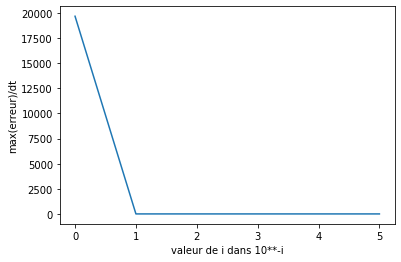

In [17]:
a_tracer = [res[i]/10**-i for i in range(6)  ]
plt.plot([0, 1, 2, 3, 4, 5] , a_tracer)
plt.xlabel("valeur de i dans 10**-i")
plt.ylabel("max(erreur)/dt")
plt.show()


On observe bien une convergence vers 0

Pour obtenir une erreur moindre, on peut aussi favoriser une méthode d'ordre 2, c'est ce que l'on va faire avec la méthode de Heun.


## Question 2 : Méthode de Heun

In [37]:
def solve_heun(f,x0,dt, t_max=10):
    x=[x0]
    t=[0]
    xj=np.array(x0)
    while t[-1] < t_max:
        tj=t[-1]
        x_approx=xj+np.array(f(xj))*dt
        x.append(xj+(dt/2)*(np.array(f(xj))+np.array(f(x_approx))))
        t.append(tj+dt)
        xj=xj+(dt/2)*(np.array(f(xj))+np.array(f(x_approx)))
    return t,x

On trace sur un même graphe la solution obetnu avec la méthode d'Euler explicite, de Heun et la solution théorique

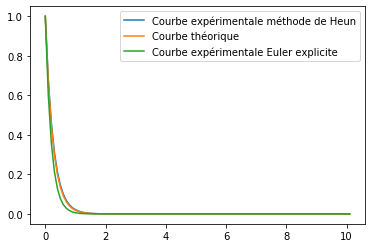

In [41]:
t2, x_exp2, = solve_heun(f,1, 10**-1)
t2, x_expbis = solve_euler_explicit(f,1, 10**-1)
x_theo = [g(i) for i in t2]
plt.plot(t2, x_exp2, label = "Courbe expérimentale méthode de Heun")
plt.plot(t2, x_theo, label="Courbe théorique")
plt.plot(t2, x_expbis, label = "Courbe expérimentale Euler explicite")
plt.legend()
plt.grid
plt.show()

On peut aussi tracer sur un même graphe l'erreur pour les deux méthodes pour pouvoir les comparer:

In [45]:
res2 = []
for n in range(6) : # on choisit 6 valeurs de dt différentes
    deltat = 10**-n
    temps, resexp = solve_heun(f,1, deltat)
    restheo = [g(i) for i in temps]
    erreur = np.array(restheo)-np.array(resexp) # tableau donnant les écarts pour un dt fixé
    res2.append(max(erreur))

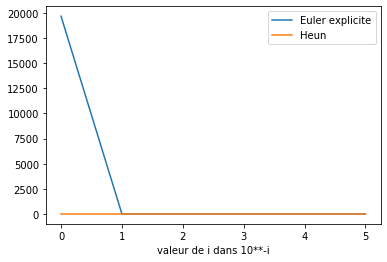

In [47]:
max_erreur1 = [res[i] for i in range(6)]
max_erreur2 = [res2[i] for i in range(6)]

plt.plot([0, 1, 2, 3, 4, 5], max_erreur1, label="Euler explicite")
plt.plot([0, 1, 2, 3, 4, 5], max_erreur2, label="Heun")

plt.xlabel("valeur de i dans 10**-i")
plt.legend()
plt.show()

## Question 3 : démonstration du résultat demandé

On va démontrer le résultat suivant quand f est de classe 1 :
\begin{align}
\left\| e^{j+1} \right\| =\Delta t_{j}  \frac{\left\|f(t_{j+1},\ x^{j+1})-f(t_{j}, \ x^{j})\right\|}{2} + O(\Delta t_{j}^{3})
\end{align}


On va utiliser la définition d'erreur locale, qui nous donne 
\begin{align}
\dot{x} &=& f(x, t) \\ 
x(t_{j}) &=& x^{j}
\end{align}

Ce qui une fois intégré donne : 
\begin{align}
\int_{t_j}^{t_{j+1}} f(s,x(s)) ds = x(t_{j+1}) - x(t_{j})
\end{align}

Puisque f est une fois continûment différentiable, x l'est deux fois, avec une formule de Taylor, on obtient donc : 
\begin{align} x(t_{j+1}) = x(t_{j}+\Delta t_{j}) =x(t_{j}) + \dot{x}(t_{j})\Delta t_{j} +\frac{\ddot{x}(t_{j})}{2}\Delta t_{j}^{2}+O(\Delta t_{j}^{3})\end{align}

Or, \begin{align} x(t_{j}) + \dot{x}(t_{j})\Delta t_{j} = x(t_{j})+ f(t_{j}, x^{j})\Delta t_{j} =x^{j+1}\end{align}

Ce qui permet d'obtenir 
\begin{align}  
e^{j+1} =  x^{j} + \int_{t_j}^{t^{j+1}} f(s,x(s)) ds  - x^{j+1} = \frac{\ddot{x}(t_{j})}{2} \Delta t_{j}^{2}+O(\Delta t_{j}^{3}) 
\end{align}

En développant lorque le pas de temps tend vers 0, il vient d'autre part :


\begin{align}
f(t_{j+1},  x^{j+1}) = f(t_{j} + \Delta t_{j},  x^{j} + \Delta t_{j}f(t_{j},x^{j})) = f(t_{j}, x^{j}) + g'(t_{j})\Delta t_{j} + O(\Delta t_{j}^{2})
\end{align}
Ou l'on note 
\begin{align}
g(t) = f(t, x(t))
\end{align}
Et puisque 
\begin{align}
g'(t_{j}) = \ddot{x}(t_{j})
\end{align}

Ce qui finalement donne :
\begin{align}
 e^{j+1}  =\Delta t_{j}  \frac{f(t_{j+1},\ x^{j+1})-f(t_{j}, \ x^{j})}{2} + O(\Delta t_{j}^{3})
\end{align}

En calculant la norme de l'erreur au carré et en effectuant un développement limité, on montre que l'on peut aussi écrire :
\begin{align}
\left\| e^{j+1} \right\| =\Delta t_{j}  \frac{\left\|f(t_{j+1},\ x^{j+1})-f(t_{j}, \ x^{j})\right\|}{2} + O(\Delta t_{j}^{3})
\end{align}


## Question 4 : Pas de temps optimal 

A la question précédente, on a démontré que : 
\begin{align}
 e^{j+1}  =\Delta t_{j}  \frac{f(t_{j+1},\ x^{j+1})-f(t_{j}, \ x^{j})}{2} + O(\Delta t_{j}^{3})
\end{align}
Mais aussi que : 
\begin{align}
f(t_{j+1},  x^{j+1}) - f(t_{j}, x^{j}) = g'(t_{j})\Delta t_{j} + O(\Delta t_{j}^{2}) = O(\Delta t_{j})
\end{align}
D'ou :
\begin{align}
e^{j+1} =  O(\Delta t_{j}^{2})
\end{align}

On a de la même manière :
\begin{align}
e^{j+2} =  O(\Delta t_{new}^{2})
\end{align}

On peut donc estimer que le rapport des deux erreurs commises aux ittérations j et j+1 vaut, à une constante multiplicative près :
\begin{align}
\frac{\left\|e^{j+1}\right\|}{\left\|e^{j+2}\right\|} \approx \frac{\Delta t_{j}^{2}}{\Delta t_{new}^{2}}
\end{align}

D'autre part, on souhaite que 
\begin{align}
\left\|e^{j+2}\right\| \leq Tol_{abs} 
\end{align}

Si l'on prend : 
\begin{align}
\left\|e^{j+2}\right\| \approx Tol_{abs} 
\end{align}

Il vient bien, à une constante multiplicative près :
\begin{align}
\Delta t_{new} \approx \Delta t \sqrt{\frac{Tol_{abs}}{\left\|e^{j+1}\right\|}}
\end{align}


## Question 5 : Fonctionnement solveur

In [50]:
from mpl_toolkits.mplot3d import Axes3D
from numpy import *
from scipy.integrate import solve_ivp
import matplotlib; 
from matplotlib.pyplot import *
import seaborn as sns
sns.set()
%matplotlib notebook

## Euler explicite à pas variable


La fonction suivante code un schéma d'Euler explicite à pas variable : l'erreur commise est estimée à chaque itération et le pas de temps adapté de façon à garder cette erreur en dessous d'un seuil. Le pas reste compris entre dtmin et dtmax fixés par l'utilisateur et sort la solution échantillonnée à dtmax. Vous devrez comprendre le fonctionnement de cette méthode et l'illustrer dans votre projet numérique.

In [ ]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # pas de temps initiale
    ts, xs = [t0], [x0]  # stockage des variables 
    t = t0 
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f: # le temps que la simulation n'a pas été réalisée sur la toatlité de l'intervalle demandé par l'utilisateur
        while ti < dtmax: #le temps que l'on atteint pas le pas de temps maximal fixé par l'utilisateur
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x) # on calcule ce qui serait utilisé par une simple méthode d'Euler explicite, et 
            x_back = x_next - dt * f(x_next) 
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error) # On calcul ici t_new multiplié par une constante multiplicative de 0.9 
            if dt < dtmin: #cas où dt est inférieur au pas de temps minimal fixé au départ
                raise ValueError("Time step below minimum") #on retourne alors une erreur
            elif dt > dtmax/2: #si on dépasse le pas de temps maximal
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x) # calcul de la solution avec le pas de temps optimal
        ts = vstack([ts,t_next]) 
        xs = vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T)

Par exemple, sur un oscillateur, le pas de temps "interne" s'adapte automatiquement à la pulsation $\omega$. Notons que la solution en sortie est toujours échantillonnées à dtmax, donc il faut diminuer ce paramètre si l'on veut plus de précision de visualisation.

In [49]:
# Oscillateur 

omega = 1

def f(xy):
    x, y = xy
    return np.array([y, -omega*x])

t0, tf, x0 = 0.0, 30.0, array([-1.0, 0.0])

t, x = solve_ivp_euler_explicit_variable_step(f, t0, x0, tf)

figure()
plt.plot(t, x[0])
plt.plot(t, x[1])
grid(True)

figure()
plt.plot(x[0],x[1])

NameError: name 'array' is not defined

On constate cependant que les solutions ne suivent pas une ellipse parfaite car l'énergie n'est pas conservée par l'algorithme. Pour ce type de système conservatif, il faudrait en fait un schéma symplectique. Voir plus bas.

## Système raide


Les systèmes raides désignent des systèmes comprenant des dynamiques aux constantes de temps très différentes. Dans ce cas, le pas nécessaire pour simuler avec précision les dynamiques très rapides est si petit, qu'il est alors impossible de simuler assez longtemps pour observer les parties lentes. La particularité de ces systèmes est que cette décroissance du pas apparaît alors que la solution est parfaitement régulière, et non pas proche de singularités.

La coexistence de dynamiques très lentes à très rapides apparaît typiqument en cinétique chimique, par exemple la réaction de Robertson : \begin{align} A & \stackrel{0.04}{\longrightarrow} B \quad \text{(lente)} \ B + B & \stackrel{3 \times 10^7}{\longrightarrow} B + C \quad \text{(très rapide)} \ B + C & \stackrel{10^4}{\longrightarrow} A + C \quad \text{(rapide)} \end{align} modélisée par \begin{align} \dot{x}_a &= -0.04 x_b + 10^4 x_bx_c \ \dot{x}_b &= 0.04 x_a - 10^4 x_bx_c - 3\times 10^7 x_b^2\ \dot{x}_c &= 3\times 10^7 x_b^2 \end{align}

Lorsqu'on applique le schéma d'Euler explicite à pas variable, le compromis précision/pas de temps devient impossible.

In [ ]:
def f(xabc):
    xa, xb, xc = xabc
    return array([-0.04 * xb + 1e4 * xb * xc, 0.04 * xa - 1e4 * xb * xc - 3e7 * xb**2,  3e7 * xb**2])

t0, tf, x0 = 0.0, 5.0, array([1.0, 0.0, 0.0])

t, x = solve_ivp_euler_explicit_variable_step(f, t0, x0, tf, dtmin = 1e-20, atol = 1)

figure()
plot(t, x[0])
plot(t, x[1])
plot(t, x[2])
grid(True)

## Système hamiltonien : exemple d'un problème à deux corps 

Voir exercice "Euler Symplectique"

In [ ]:
e = 0.01
q0 = array([1-e,0.0])
p0 = array([0.0,sqrt((1+e)/(1-e))])
t0, tf, dt = 0.0 , 50.0, 0.01

In [ ]:
def solve_ivp_euler_symplectic(fp, fq, t0, q0, p0, dt, tf):
    ts, qs, ps = [t0], [q0], [p0]
    while ts[-1] < tf:
        t, q, p = ts[-1], qs[-1], ps[-1]
        t_next, q_next = t + dt, q + dt*fq(p)
        p_next = p + dt*fp(q_next)
        ts = vstack([ts,t_next])
        qs = vstack([qs,q_next])
        ps = vstack([ps,p_next])
    return (ts, qs.T, ps.T)

In [ ]:
def fq(p):
    return p

def fp(q):
    q1, q2 = q
    return array([-q1/power(q1**2+q2**2,3/2),-q2/power(q1**2+q2**2,3/2)])

def fun(qp):
    q1, q2, p1, p2 = qp
    return concatenate([fq([p1,p2]),fp([q1,q2])])

In [ ]:
t, q, p = solve_ivp_euler_symplectic(fp, fq, t0, q0, p0, dt, tf)

t, qp = solve_ivp_euler_explicit_variable_step(fun, t0, concatenate([q0,p0]), tf)

figure()
plot(q[0], q[1])
plot([0.0],[0.0],'.')
grid(True)
title('Euler symplectique')

figure()
plot(qp[0],qp[1])
plot([0.0],[0.0],'.')
grid(True)
title('Euler explicite pas variable')